In [1]:
import numpy as np

In [3]:
A = np.arange(4).reshape(2,2)
A

array([[0, 1],
       [2, 3]])

In [4]:
b = np.array([8,9])
b

array([8, 9])

In [5]:
np.linalg.solve(A, b)

array([-7.5,  8. ])

In [6]:
np.linalg.inv(A)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [7]:
np.linalg.inv(A).dot(b)

array([-7.5,  8. ])

In [12]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def compute_polynomial_coeffs(n):
    '''
    n - количество точек
    '''
    xx = np.linspace(1, 15, n)
    yy = f(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

In [18]:
from matplotlib import pyplot as plt

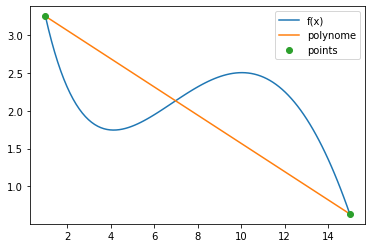

In [25]:
n = 2
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

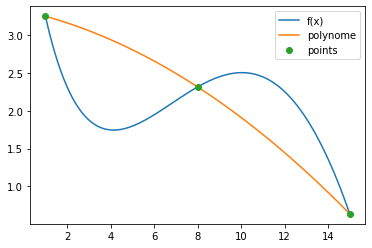

In [26]:
n = 3
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

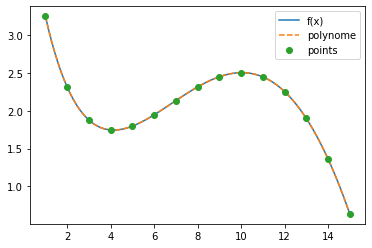

In [39]:
n = 15
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

In [69]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def compute_polynomial_coeffs(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

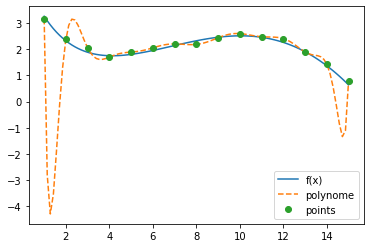

In [77]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

n = 15
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

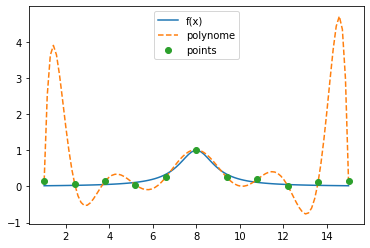

In [78]:
def f(x):
    return 1 / ((x-8)**2 + 1)

n = 11
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

In [80]:
n = 11
x_points = np.linspace(1, 15, n)
A = np.zeros((n, n))
for i in range(n):
    A[:,i] = x_points**i

# <div style="text-align: right"> Назарьин Артем, НПМбд-02-19 </div>
# <center> Метод наименьших квадратов </center>

Рассмотрим сложную математическую функцию на отрезке $x \in [1;15]$: 
$ f(x) = \sin(x/5) e^{x/10} + 5e^{-1/2x} $
Задача состоит в том, чтобы приблизить сложную зависимость с помощью функции из
определенного семейства. В этом задании мы будем приближать указанную функцию с
помощью многочленов.
<p> Как известно, многочлен степени n-1 (то-есть $w_{0}+w_{1}x+w_{2}x^{2}+w_{3}x^{3}+ .. + w_{n}x^{n}$) однозначно определяется любыми n различными точками, через которые он проходит.
<p> Это значит, что его n неизвестных коэффициентов $w_{0},w_{1},w_{2},...,w_{n-1}$ можно определить из
следующей системы линейных уравнений:</p>
\begin{cases} w_{0}+w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+ .. + w_{n-1}x_{1}^{n} = f(x_{1}) \\ ... \\ w_{0}+w_{1}x_{n}+w_{2}x_{n}^{2}+w_{3}x_{n}^{3}+ .. + w_{n-1}x_{n}^{n} = f(x_{n}) \end{cases}


In [51]:
import numpy as np
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def compute_polynomial_coeffs(n):
    '''
    n - количество точек
    '''
    xx = np.linspace(1, 15, n)
    yy = f(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

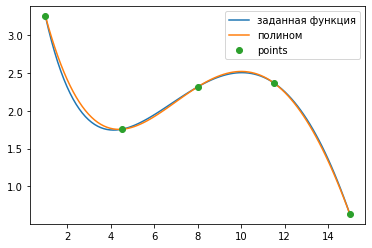

In [58]:
from matplotlib import pyplot as plt
n = 5
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='заданная функция')
plt.plot(xx, polynome(w, xx), label='полином')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

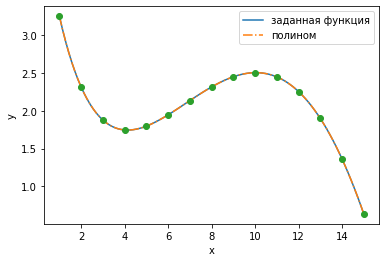

In [59]:
n = 15
w = compute_polynomial_coeffs(n)
fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)
x = np.linspace(1, 15, n)
ax.plot(xx, f(xx), label = 'заданная функция')
ax.plot(xx, polynome(w, xx), label = 'полином', linestyle = 'dashdot')
ax.plot(x, f(x), marker = 'o', linestyle = '')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

Вывод: Полином  ведет себя "лучше" с увеличением числа точек.

## Задание 2
Рассмотрим случай, когда значение функции f известно с некоторой неточностью. Для этого добавим к значениям функции ( )i f x случайный шум. Шум сгенерируем из гауссового распределения с нулевым средним и стандартным отклонением   0.01.

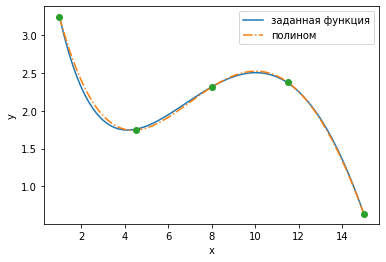

In [60]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def compute_polynomial_coeffs(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

n = 5
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_polynomial_coeffs(x_points, y_points)
fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label = 'заданная функция')
ax.plot(xx, polynome(w, xx), label = 'полином', linestyle = 'dashdot')
ax.plot(x_points, y_points, marker = 'o', linestyle = '')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()


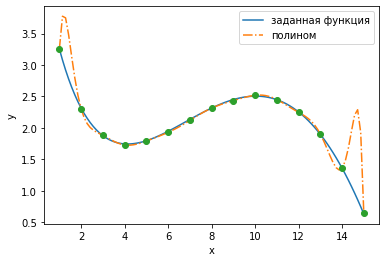

In [62]:
n = 15
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)

ax.plot(xx, f(xx), label = 'заданная функция')
ax.plot(xx, polynome(w, xx), label = 'полином', linestyle = 'dashdot')
ax.plot(x_points, y_points, marker = 'o', linestyle = '')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

При добавлении шума с ростом числа точек полином начинает вести себя "хуже" на концах графика.

## Задание 3
<p> Возьмем <strong> N = 100 </strong> точек на отрезке $x \in [1;15]$ и посчитаем в них значение функции f,
добавим гауссовово распределение с большим шумом $ \sigma $ = 0.1. Построим методом наименьших квадратов кубический полином по данным точкам. </p>
<p> Используем псевдообращение Мура-Пенроуза:</p> 
<font size = 5> $x = A^{+}b = (A^{T}A)^{-1}A^{T}b $ </font>


In [63]:
def Least_squares(xx, yy):
    n = len(xx)
    b = yy
    power = 3 
    A = np.ones([n, power + 1])
    for i in range(1, power + 1):
        A[:, i] = xx ** i
    return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

<function matplotlib.pyplot.show(*args, **kw)>

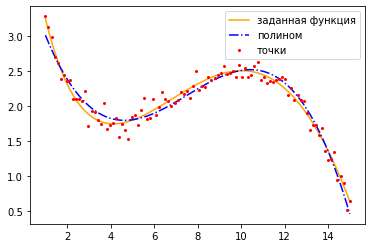

In [64]:
n = 100
noise = 0.1

x_points = x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = Least_squares(x_points, y_points)

fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)

plt.plot(x_points, f(x_points), label = 'заданная функция', color = 'orange')
plt.plot(x_points, polynome(w, x_points), label = 'полином', linestyle = 'dashdot', color ='blue')
plt.plot(x_points, y_points, 'o', linestyle = '', markersize = 2, color = 'red', label = 'точки')

plt.legend()
plt.show

Увеличим степень полинома:

<function matplotlib.pyplot.show(*args, **kw)>

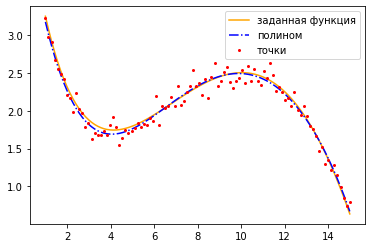

In [65]:
def Least_squares(xx, yy):
    n = len(xx)
    b = yy
    power = 5
    A = np.ones([n, power + 1])
    for i in range(1, power + 1):
        A[:, i] = xx ** i
    return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

n = 100
noise = 0.1

x_points = x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = Least_squares(x_points, y_points)

fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)

plt.plot(x_points, f(x_points), label = 'заданная функция', color = 'orange')
plt.plot(x_points, polynome(w, x_points), label = 'полином', linestyle = 'dashdot', color ='blue')
plt.plot(x_points, y_points, 'o', linestyle = '', markersize = 2, color = 'red', label = 'точки')

plt.legend()
plt.show

Получили достаточно точное приближение.